In [108]:
import matplotlib.pyplot as plt
import numpy as np
from basicODE import ODESolve

In [109]:
# Scalar value of derivative of norm, given x and dx
def norm_deriv(x, dx, axis=0):
    
    x = np.asarray(x).reshape(-1,2)
    dx = np.asarray(dx).reshape(-1,2)
    
    return np.inner(x, dx) / np.linalg.norm(x, axis=axis)


def f ( t, x, params={} ):
    v = params.get('verbose', False)
    
    x = np.asarray(x).reshape(-1,2,4)
    pos = x[:,0,:].reshape(-1,2,2)
    vel = x[:,1,:].reshape(-1,2,2)

    dp = (pos[:,0,:] - pos[:,1,:])
    dv = (vel[:,0,:] - vel[:,1,:])
    
    d = np.linalg.norm(dp, axis=1)
    dvel = norm_deriv(dp, dv, axis=1)
    
    force = \
          params.get('springConst', 1.0) \
        * ( params.get('rest', 0.0) - d ) \
        - params.get('dampConst', 1.0) * dvel
      
    forcevec = (force/d) * dp
        
    res = np.concatenate([
        vel[:,0,:],
        vel[:,1,:],
        forcevec,
        -1*forcevec
    ], axis=1).reshape(-1,4,2)
    
    return res.reshape(-1,1)


def getDist (x):
    x = np.asarray(x).reshape(-1,2,4)
    pos = x[:,0,:].reshape(-1,2,2)
    d = np.linalg.norm(pos, axis=2)
    return d

I only did the first part, and I ignored the moon


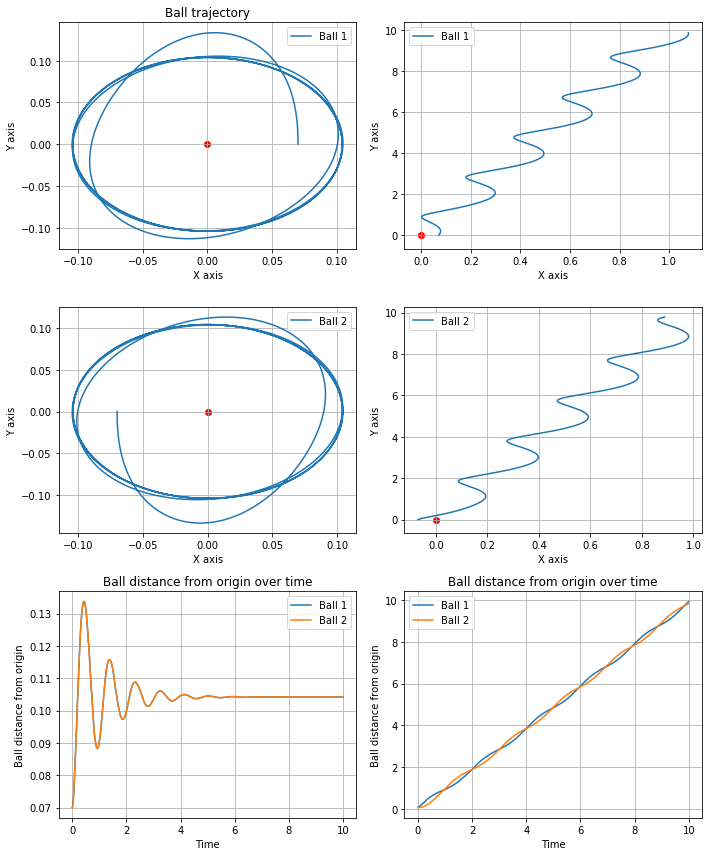

In [110]:
trial = [
    [
        #Position
        [[0.07,  0],
        [-0.07, 0],],
        # velocity
        [[0,  0.5],
        [0, -0.5],],
    ],
    [
        #Position
        [[0.07,  0],
        [-0.07, 0],],
        # velocity
        [[0.1, 1.5],
        [0.1, 0.5],],
    ]
    
]

tol = 1.0e-5
tstart, tend = (0, 10)
dtmin, dtmax = (1.0e-9, 0.5)

params = {
    'springConst': 10,
    'rest': 0.1,
    'dampConst': 1.0,
}

################
figsize = (10,12)
fig, axs = plt.subplots(3, 2, figsize=figsize)
print("I only did the first part, and I ignored the moon")


for j, info in enumerate(trial):
    for ball, i in enumerate(range(axs.shape[0])):
        pos0, vel0 = info
        
        p0 = np.concatenate([
            np.asarray(pos0).reshape(-1,1),
            np.asarray(vel0).reshape(-1,1),
        ], axis=0).reshape(-1,1)
        
        xs, ts, dts, dist = ODESolve (
            x0=p0,
            vf = lambda t, x: f(t,x, params=params),
            tstart = tstart,
            tend = tend,
            dtmin = dtmin,
            dtmax = dtmax,
            tol = tol,
            norm = np.linalg.norm,
            metricLogger = getDist
        )
        
        dist = np.concatenate(dist, axis=1).reshape(-1,2)
        xs = xs.reshape(-1, 4, 2)
        
        ax = axs[i,j]
        if ball in [0,1]:
            ax.plot(
                xs[:,ball,0],
                xs[:,ball,1],
                label='Ball {0}'.format(ball + 1),
            )
            ax.scatter([0],[0], color='red')
            ax.set_xlabel('X axis')
            ax.set_ylabel('Y axis')
        elif ball in [2]:
            balls = [0,1]
            for ball in balls:
                ax.plot(
                    ts,
                    dist[:, ball],
                    label='Ball {0}'.format(ball + 1),
                )

            ax.set_title('Ball distance from origin over time')
            ax.set_xlabel('Time')
            ax.set_ylabel('Ball distance from origin')
        ax.grid()
        ax.legend()
    

axs[0,0].set_title('Ball trajectory')
fig.tight_layout()
plt.show()